In [1]:
# A multi-class classification
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

We have 8982 training data and 2246 test data

In [3]:
print('train_data', len(train_data))
print('test_data', len(test_data))

train_data 8982
test_data 2246


In [4]:
# Preparing the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# Building the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Validating our approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [9]:
# train the network for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 124us/step - loss: 2.5492 - accuracy: 0.5175 - val_loss: 1.7229 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.4146 - accuracy: 0.7090 - val_loss: 1.3197 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.0551 - accuracy: 0.7764 - val_loss: 1.1530 - val_accuracy: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.8284 - accuracy: 0.8217 - val_loss: 1.0334 - val_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.6554 - accuracy: 0.8629 - val_loss: 0.9619 - val_accuracy: 0.8080
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5230 - accuracy: 0.8909 - val_loss: 0.9274 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.41

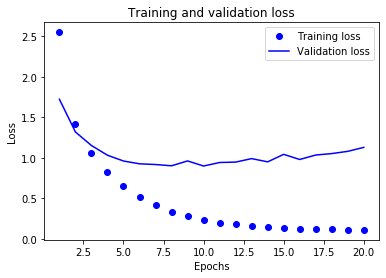

In [10]:
# loss and accuracy curves

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

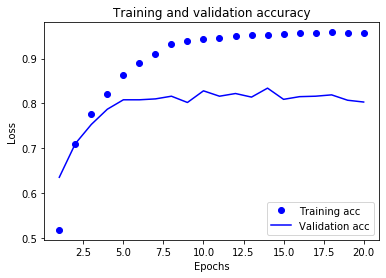

In [11]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [13]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 108us/step


[1.256862762031657, 0.7831701040267944]

### accuracy reached is ~78% 
### Generating predictions on new data

In [16]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)